## Imports 

In [1]:
# Python Modules
# --------------------------------------------------
import os
import cv2
import numpy             as np
import pandas            as pd
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


# Torch Modules
# --------------------------------------------------
import torch


# Custom Modules
# --------------------------------------------------
import config
import utils

from models import Net

## Download Data

In [3]:
%%capture
if not all([
    os.path.isdir(config.TRAIN_DATA_FILEPATH),
    os.path.isdir(config.TEST_DATA_FILEPATH)
]):
    !sh load_data.sh

## Import Data

In [4]:
keypoints_frame = pd.read_csv(config.TRAIN_KEYPOINTS_PATH)

## Load Network

In [5]:
if os.path.isfile(f"{config.MODEL_DIR}/{config.MODEL_NAME}"): 
    net = Net()
    
    net.load_state_dict(torch.load(f"{config.MODEL_DIR}/{config.MODEL_NAME}"))
    net.eval()
    
    print(net)
    
else:
    print(f"[ERROR] network not found: {config.MODEL_DIR}/{config.MODEL_NAME}")

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop1): Dropout(p=0.1)
  (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop2): Dropout(p=0.2)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop3): Dropout(p=0.3)
  (conv4): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop4): Dropout(p=0.4)
  (conv5): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
  (pool5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop5): Dropout(p=0.5)
  (fc1): Linear(in_features=9216, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True

## Predict

In [9]:
# Get Image
# --------------------------------------------------
image_name = keypoints_frame.iloc[config.FILTER_IMAGE_IDX, 0]
image      = mpimg.imread(os.path.join(config.TRAIN_DATA_FILEPATH, image_name))


# # Preprocess Image
# # --------------------------------------------------
image = utils.rescale_numpy(image)
image = utils.random_crop_numpy(image)

image_np = np.copy(image)

image = utils.normalize_numpy(image)
image = utils.to_tensor_numpy(image)


# Get Keypoints
# --------------------------------------------------
keypoints = utils.predict(
    model = net, 
    image = image
)

## Add Sunglasses

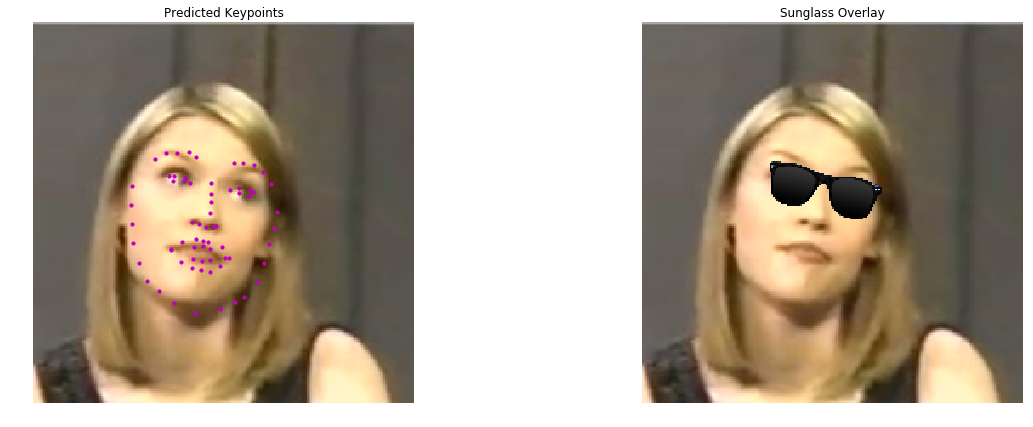

In [10]:
utils.filter_sunglasses(
    image     = image_np, 
    keypoints = keypoints
)